In [1]:
import librosa
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set current working directory to parent folder
os.chdir(os.path.abspath(".."))

In [2]:
# Archivos importantes y paths
df_annotations = pd.read_excel('data/annotations.xlsx')

# Omitimos todos los audios en development
df_annotations = df_annotations[df_annotations['Type'] != 'Development'].reset_index(drop = True)

In [20]:
def obtener_anotaciones(conversation, emocion):

    time = pd.DataFrame()

    df_file = df_annotations[(df_annotations['Emotion'] == emocion) & (df_annotations['Conversation_Part'] == conversation)]
    
    for annotation, annotator in zip(df_file['Annotation_File'], df_file['Annotator']):
        temp_df = pd.read_csv(f'data/MSPCORPUS/Annotations/{emocion}/{annotation}', skiprows=9, header=None, names=['Time', 'Annotation'])
        temp_df['Annotator'] = annotator
        time = pd.concat([time, temp_df], ignore_index = True)
    
    df_pivot = pd.DataFrame(time.pivot_table(columns = 'Annotator', index = 'Time', values = 'Annotation').to_records()).set_index('Time')
    df_pivot = df_pivot.fillna(method='ffill')
    #df_pivot['Vote'] = df_pivot.mean(axis = 1)
    df_pivot['Emotion'] = emocion
    #df_pivot['Vote_Roll'] = df_pivot['Vote'].rolling(200).mean()
    df_pivot = df_pivot.reset_index()
    
    return df_pivot

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\50809684.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')


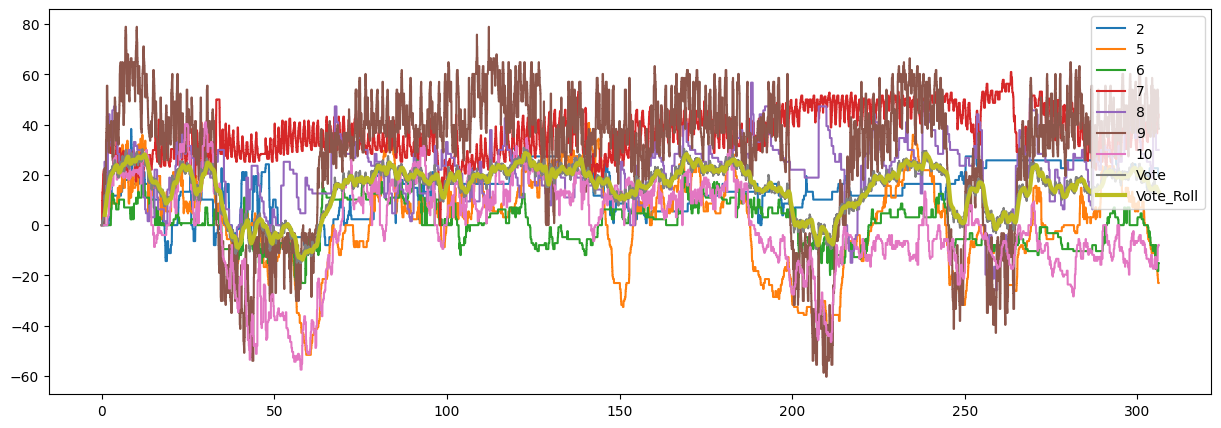

In [6]:
df_graf = obtener_anotaciones('MSP-Conversation_0021_1', 'Valence')

graficos = df_graf.drop(['Time','Emotion'], axis = 1).columns

plt.figure(figsize = (15,5))
for grafico in graficos:
    if grafico == 'Vote_Roll':
        plt.plot(df_graf['Time'], df_graf[grafico], label = grafico, linewidth = 3)
    else:
        plt.plot(df_graf['Time'], df_graf[grafico], label = grafico)
    
plt.legend(loc = "upper right")
plt.xticks()
plt.show()

Cronbach’s Alpha 

In [37]:
import pingouin as pg

emociones = ['Valence','Dominance','Arousal']

X = []

for anotacion in df_annotations['Conversation_Part'].unique():
    
    for emocion in emociones:
        
        x = []
        
        df_graf = obtener_anotaciones(anotacion, emocion)
        df_graf = df_graf.drop(['Time','Emotion'], axis = 1)
        
        x.append(emocion)
        x.append(anotacion)
        x.append(pg.cronbach_alpha(data = df_graf)[0])
        
        X.append(x)

df_votacion = pd.DataFrame(X, columns = ['Emocion','Conversation_Part','Cronbanch'])

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users

C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\AppData\Local\Temp\ipykernel_23844\409724071.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')


In [39]:
df_votacion.to_excel('data/cronbanch_parts.xlsx',index = False)